In [ ]:
Part A

In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

Step 3: Preprocess the Text

In [2]:
import re

def preprocess_text(text):
    """
    Preprocess the input text by removing unnecessary characters
    and standardizing the format.
    
    Parameters:
    text (str): The input text to be cleaned.
    
    Returns:
    str: The cleaned text.
    """
    # Remove unnecessary characters and standardize the text
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()  # Remove leading and trailing spaces

# Example usage
input_text = "   Rahul wakes up early every day.   "
cleaned_text = preprocess_text(input_text)
print(f"Original Text: '{input_text}'")
print(f"Cleaned Text: '{cleaned_text}'")

Original Text: '   Rahul wakes up early every day.   '
Cleaned Text: 'Rahul wakes up early every day.'


Visualization

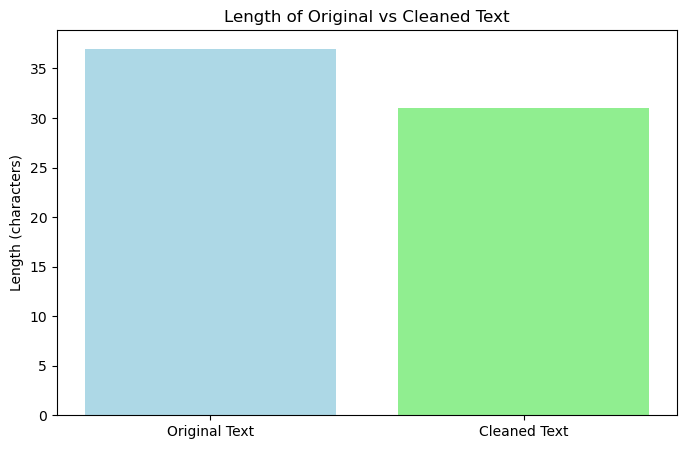

In [7]:
import matplotlib.pyplot as plt

# Example input text
input_text = "   Rahul wakes up early every day.   "
cleaned_text = preprocess_text(input_text)

# Lengths of original and cleaned text
lengths = [len(input_text), len(cleaned_text)]
labels = ['Original Text', 'Cleaned Text']

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, lengths, color=['lightblue', 'lightgreen'])
plt.title('Length of Original vs Cleaned Text')
plt.ylabel('Length (characters)')
plt.show()

Step 4: Identify Tasks

In [8]:
import nltk
from nltk.tokenize import sent_tokenize

def identify_tasks(text):
    """
    Identify sentences that contain tasks based on specific keywords.
    
    Parameters:
    text (str): The input text to analyze.
    
    Returns:
    list: A list of sentences that contain tasks.
    """
    # Define keywords that indicate a task
    task_keywords = [
        "have to", "should", "must", "need to", "is supposed to", "has to", 
        "buy", "clean", "finish", "complete"
    ]
    
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    tasks = []

    for sentence in sentences:
        # Check for task keywords in the sentence
        if any(keyword in sentence for keyword in task_keywords):
            tasks.append(sentence)

    return tasks

In [9]:
def identify_tasks(text):
    task_keywords = [
        "have to", "should", "must", "need to", "is supposed to", "has to", 
        "buy", "clean", "finish", "complete"
    ]
    sentences = sent_tokenize(text)
    tasks = []

    for sentence in sentences:
        if any(keyword in sentence for keyword in task_keywords):
            tasks.append(sentence)

    return tasks

# Example usage
text = "Rahul has to buy snacks. He goes to college."
tasks = identify_tasks(text)
print("Identified Tasks:", tasks)

Identified Tasks: ['Rahul has to buy snacks.']


Visualization

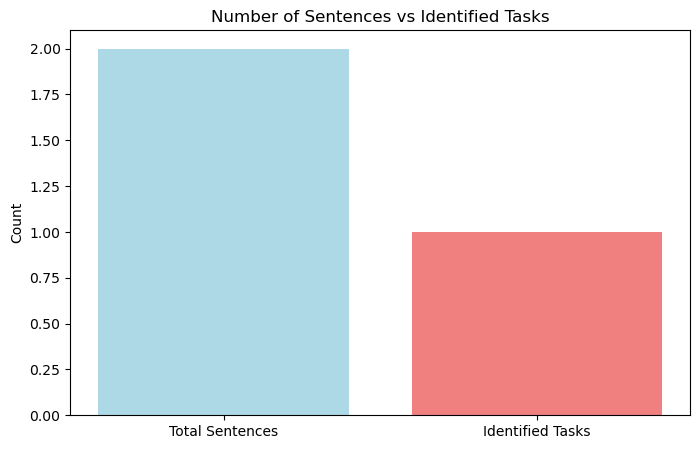

In [10]:
# Example text
text = "Rahul has to buy snacks. He goes to college."

# Identify tasks
tasks = identify_tasks(text)

# Count sentences and tasks
num_sentences = len(sent_tokenize(text))
num_tasks = len(tasks)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Total Sentences', 'Identified Tasks'], [num_sentences, num_tasks], color=['lightblue', 'lightcoral'])
plt.title('Number of Sentences vs Identified Tasks')
plt.ylabel('Count')
plt.show()

Step 5: Extract Entities

In [4]:
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def extract_entities(task):
    """
    Extract entities (who and when) from the identified task.
    
    Parameters:
    task (str): The task sentence to analyze.
    
    Returns:
    dict: A dictionary containing the 'who' and 'when' entities.
    """
    # Simple heuristic to extract entities (who and when)
    entities = {
        "who": None,
        "when": None
    }
    
    # Tokenize and tag parts of speech
    words = word_tokenize(task)
    tagged = pos_tag(words)

    # Extract the subject (who) - assuming the first noun or pronoun is the subject
    for word, tag in tagged:
        if tag in ['NNP', 'NN', 'PRP']:  # Proper Noun, Noun, Pronoun
            entities["who"] = word
            break

    # Look for time expressions (when)
    time_pattern = r'\b(by|before|after|at|on|in|tomorrow|today|next|last)\s+\w+\s*(\d{1,2}:\d{2}|\d{1,2})?\b'
    time_matches = re.findall(time_pattern, task)
    if time_matches:
        entities["when"] = ' '.join(time_matches[0])

    return entities

In [11]:
def extract_entities(task):
    entities = {
        "who": None,
        "when": None
    }
    
    words = word_tokenize(task)
    tagged = pos_tag(words)

    for word, tag in tagged:
        if tag in ['NNP', 'NN', 'PRP']:  # Proper Noun, Noun, Pronoun
            entities["who"] = word
            break

    time_pattern = r'\b(by|before|after|at|on|in|tomorrow|today|next|last)\s+\w+\s*(\d{1,2}:\d{2}|\d{1,2})?\b'
    time_matches = re.findall(time_pattern, task)
    if time_matches:
        entities["when"] = ' '.join(time_matches[0])

    return entities

# Example usage
task = "Rahul should clean the room by 5 pm today."
entities = extract_entities(task)
print("Extracted Entities:", entities)

Extracted Entities: {'who': 'Rahul', 'when': 'by '}


Visualization

In [ ]:
# Example task
task = "Rahul should clean the room by 5 pm today."
entities = extract_entities(task)

# Count entities
num_entities = sum(1 for value in entities.values() if value is not None)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Extracted Entities'], [num_entities], color='lightblue')
plt.title('Number of Extracted Entities from Task')
plt.ylabel('Count')
plt.show()

Step 6: Extract Tasks from Text

In [14]:
def extract_tasks_from_text(text):
    """
    Extract tasks and their associated entities from the input text.
    
    Parameters:
    text (str): The input text to analyze.
    
    Returns:
    list: A list of dictionaries containing tasks and their entities.
    """
    # Preprocess the text
    cleaned_text = preprocess_text(text)
    
    # Identify tasks
    tasks = identify_tasks(cleaned_text)
    
    # Extract entities for each task
    extracted_info = []
    for task in tasks:
        entities = extract_entities(task)
        extracted_info.append({
            "task": task,
            "who": entities["who"],
            "when": entities["when"]
        })
    
    return extracted_info

In [6]:
# Example input text
input_text = """
Rahul wakes up early every day. He goes to college in the morning and comes back at 3 pm. 
At present, Rahul is outside. He has to buy the snacks for all of us. 
Rahul should clean the room by 5 pm today.
"""

# Extract tasks from the input text
tasks_info = extract_tasks_from_text(input_text)

# Display the extracted tasks
for info in tasks_info:
    print(f"Task: {info['task']}")
    print(f"Who: {info['who']}")
    print(f"When: {info['when']}")
    print("-----")

Task: He has to buy the snacks for all of us.
Who: He
When: None
-----
Task: Rahul should clean the room by 5 pm today.
Who: Rahul
When: by 
-----


Visualization

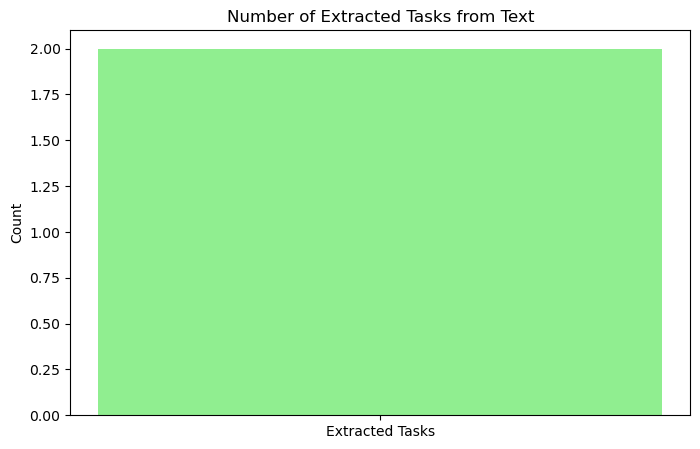

In [16]:
# Example input text
input_text = """
Rahul has to buy the snacks for all of us. 
Rahul should clean the room by 5 pm today.
"""

# Extract tasks from the input text
tasks_info = extract_tasks_from_text(input_text)

# Count tasks
num_extracted_tasks = len(tasks_info)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Extracted Tasks'], [num_extracted_tasks], color='lightgreen')
plt.title('Number of Extracted Tasks from Text')
plt.ylabel('Count')
plt.show()